In [1]:
!pip install pmdarima

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

from statsmodels.tsa.statespace.sarimax import SARIMAX

from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose      
from pmdarima import auto_arima                           

from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

df = pd.read_csv('BeerWineLiquor.csv',index_col='date',parse_dates=True)
df.index.freq = 'MS'
print(len(df))
print(df.head())

324
            beer
date            
1992-01-01  1509
1992-02-01  1541
1992-03-01  1597
1992-04-01  1675
1992-05-01  1822


[Text(0.5, 0, ''), Text(0, 0.5, 'gallon')]

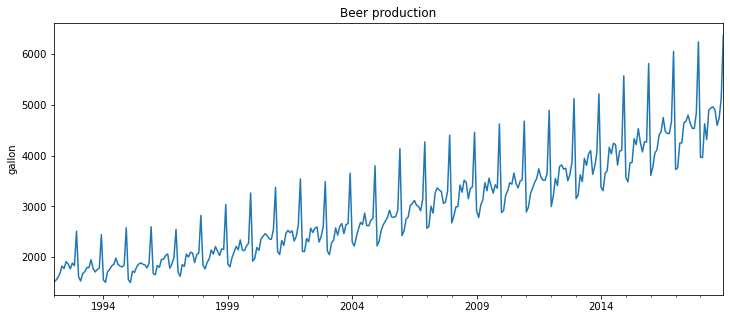

In [6]:
title = 'Beer production'
ylabel = 'gallon' 
xlabel = ''

ax = df['beer'].plot(figsize=(12,5),title=title)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

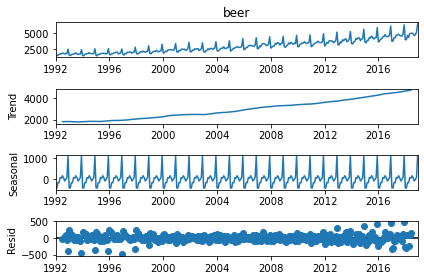

In [8]:
r = seasonal_decompose(df['beer'],model='additive')
r.plot();

In [10]:
auto_arima(df['beer'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.461
Date:                              Sun, 19 Dec 2021   AIC                           3570.922
Time:                                      16:02:42   BIC                           3612.060
Sample:                                           0   HQIC                          3587.366
                                              - 324                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0164      0.088    -11.504      0.000      -1.190      -0.843
ar.L2         -0.5550      0.158     -3.521      0.000      -0.864      -0.246
ar.L3          0.4651      0.157      2.962      0.003       0.157       0.773
ar.L4          0.2819      0.089      3.181      0.001       0.108       0.456
ma.L1          0.2116      0.063      3.351      0.001       0.088       0.335
ma.L2         -0.0433      0.063     -0.688      0.492      -0.167       0.080
ma.L3         -0.8773      0.048    -18.137      0.000      -0.972      -0.783
ar.S.L12      -0.9411      0.395     -2.384      0.017      -1.715      -0.167
ar.S.L24      -0.2249      0.086     -2.601      0.009      -0.394      -0.055
ma.S.L12       0.6936      0.395      1.756      0.079      -0.081       1.468
sigma2      5886.4769    517.254     11.380      0.000    4872.677    6900.277
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.65   Prob(JB):                         0.49
Heteroskedasticity (H):               2.04   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
train = df.iloc[:len(df)-12]
test = df.iloc[len(df)-12:]

In [12]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [14]:
model = SARIMAX(train['beer'],order=(4, 1, 3),seasonal_order=(2, 1, 1, 12))
results = model.fit()
results.summary()

C:\Users\ozon\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\ozon\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 beer   No. Observations:                  312
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1704.140
Date:                              Sun, 19 Dec 2021   AIC                           3430.279
Time:                                      16:05:38   BIC                           3470.984
Sample:                                  01-01-1992   HQIC                          3446.571
                                       - 12-01-2017                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9564      0.102     -9.415      0.000      -1.155      -0.757
ar.L2         -0.4631      0.168     -2.749      0.006      -0.793      -0.133
ar.L3          0.5421      0.166      3.266      0.001       0.217       0.867
ar.L4          0.2974      0.099      3.002      0.003       0.103       0.492
ma.L1          0.1849      0.076      2.438      0.015       0.036       0.333
ma.L2         -0.0571      0.075     -0.765      0.444      -0.203       0.089
ma.L3         -0.8671      0.056    -15.605      0.000      -0.976      -0.758
ar.S.L12       0.1139      0.601      0.190      0.850      -1.063       1.291
ar.S.L24      -0.0359      0.171     -0.210      0.834      -0.371       0.299
ma.S.L12      -0.3494      0.603     -0.580      0.562      -1.531       0.832
sigma2      6153.1018    597.157     10.304      0.000    4982.696    7323.508
===================================================================================
Ljung-Box (L1) (Q):                   0.18   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.67   Prob(JB):                         0.41
Heteroskedasticity (H):               1.97   Skew:                            -0.02
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.38
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
start=len(train)
end=len(train)+len(test)-1
predictions = results.predict(start=start, end=end, dynamic=False, typ='levels').rename(' Predictions SARIMAX(4, 1, 3)x(2, 1, [1], 12)')

<AxesSubplot:xlabel='date'>

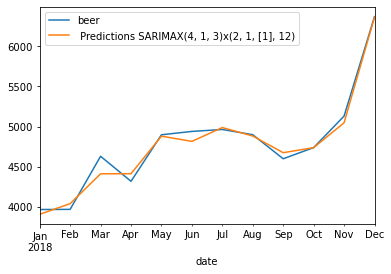

In [16]:
test['beer'].plot(legend=True)
predictions.plot(legend=True)

[Text(0.5, 0, ''), Text(0, 0.5, 'Gallons')]

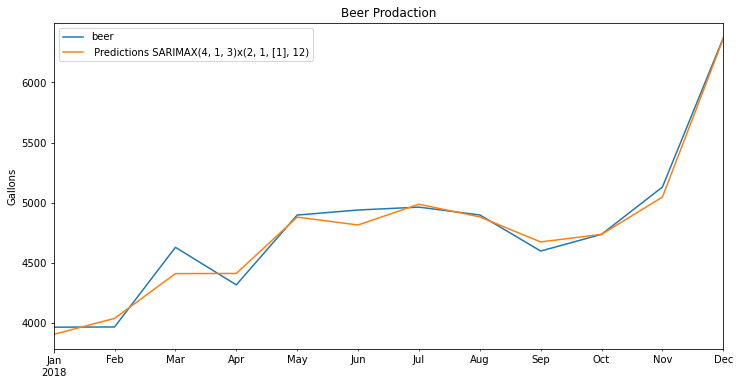

In [17]:
title = 'Beer Prodaction'
ylabel = 'Gallons' 
xlabel = '' 


ax = test['beer'].plot(legend=True, figsize=(12,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)

Оценим качество модели методом и MSE RMSE

In [18]:
error1 = mean_squared_error(test['beer'], predictions)
error2 = rmse(test['beer'], predictions)
print(f'SARIMAX(4, 1, 3)x(2, 1, [1], 12) MSE Error: {error1:11.10}')
print(f'SARIMAX(4, 1, 3)x(2, 1, [1], 12) RMSE Error: {error2:11.10}')

SARIMAX(4, 1, 3)x(2, 1, [1], 12) MSE Error:  7896.30296
SARIMAX(4, 1, 3)x(2, 1, [1], 12) RMSE Error: 88.86114426


In [19]:
model = SARIMAX(df['beer'],order=(4, 1, 3),seasonal_order=(2, 1, 1, 12))
results = model.fit()
results.summary()

C:\Users\ozon\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                 beer   No. Observations:                  324
Model:             SARIMAX(4, 1, 3)x(2, 1, [1], 12)   Log Likelihood               -1774.461
Date:                              Sun, 19 Dec 2021   AIC                           3570.922
Time:                                      17:08:53   BIC                           3612.060
Sample:                                  01-01-1992   HQIC                          3587.366
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0164      0.088    -11.504      0.000      -1.190      -0.843
ar.L2         -0.5550      0.158     -3.521      0.000      -0.864      -0.246
ar.L3          0.4651      0.157      2.962      0.003       0.157       0.773
ar.L4          0.2819      0.089      3.181      0.001       0.108       0.456
ma.L1          0.2116      0.063      3.351      0.001       0.088       0.335
ma.L2         -0.0433      0.063     -0.688      0.492      -0.167       0.080
ma.L3         -0.8773      0.048    -18.137      0.000      -0.972      -0.783
ar.S.L12      -0.9411      0.395     -2.384      0.017      -1.715      -0.167
ar.S.L24      -0.2249      0.086     -2.601      0.009      -0.394      -0.055
ma.S.L12       0.6936      0.395      1.756      0.079      -0.081       1.468
sigma2      5886.4769    517.254     11.380      0.000    4872.677    6900.277
===================================================================================
Ljung-Box (L1) (Q):                   0.21   Jarque-Bera (JB):                 1.44
Prob(Q):                              0.65   Prob(JB):                         0.49
Heteroskedasticity (H):               2.04   Skew:                             0.06
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:>

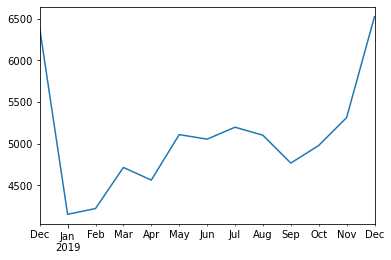

In [20]:
fcast = results.predict(len(df)-1,len(df)+11,typ='levels').rename('SARIMAX(4, 1, 3)x(2, 1, [1], 12) ')
fcast.plot()

[Text(0.5, 0, ''), Text(0, 0.5, 'Gallons')]

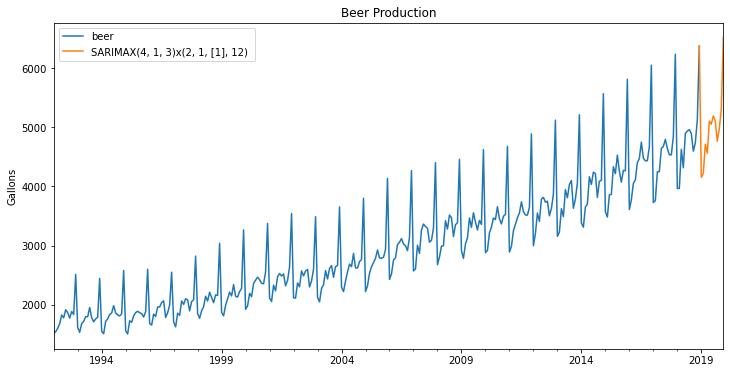

In [21]:
title = 'Beer Production'
ylabel = 'Gallons' 
xlabel = '' 

ax = df['beer'].plot(legend=True, figsize=(12,6),title=title) 
fcast.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel=ylabel)